# Project title:- 
Advancing Earth Observation Data and ResUNet-Deep Learning Model for Irrigated Area Mapping: The Case of Along the Awash Valley, Ethiopia


# Layerstacking  Sentinel 2 MSI level 2 surface reflectance images using the Inovation Lab cloud computing environment

This Jupyter notebook demonstrates how to layerstack S2 MSI level 2 surface refelectance  with the ESA EO-Africa inovation lab cloud computing environment.


**Prerequisites for running this notebook**

Several packages need to be installed and/or imported for running this script:

 
The `rasterio` module should be installed first for layer stacking Sentinel 2 MSI level 2 surface reflectance images ;


In [ ]:
!pip install rasterio # Install the rasterio library using pip

## Importing the relevant modules 


In [10]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt

###  Function to stack Sentinel-2 bands

In [12]:
def stack_sentinel_bands(input_folder, output_path):
    # List all tif files in the input folder
    files = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith('.tif')]

    # Read metadata of first file
    with rasterio.open(files[0]) as src0:
        meta = src0.meta

    # Update metadata for the stacked file
    meta.update(count = len(files))

    # Read each layer and store them in an array
    arr_stack = []
    for f in files:
        with rasterio.open(f) as src:
            arr_stack.append(src.read(1))

   # Stack the arrays
    stacked_array = np.stack(arr_stack)

   # Write the stacked array to a new tif file
    with rasterio.open(output_path, 'w', **meta) as dst:
        dst.write(stacked_array)

    print("Stacked bands saved successfully to", output_path)

   # Specify input folder and output path

input_folder = '/home/eoafrica/Sentinel2_AWbasin/selectedbands'
output_path = '/home/eoafrica/Sentinel2_AWbasin/sentinel2_layerstack/stacked_rgb2.tif'

# Stack bands

stack_sentinel_bands(input_folder, output_path)

### Visualize the stacked bands

Stacked bands saved successfully to /home/eoafrica/Sentinel2_AWbasin/sentinel2_layerstack/stacked_rgb2.tif


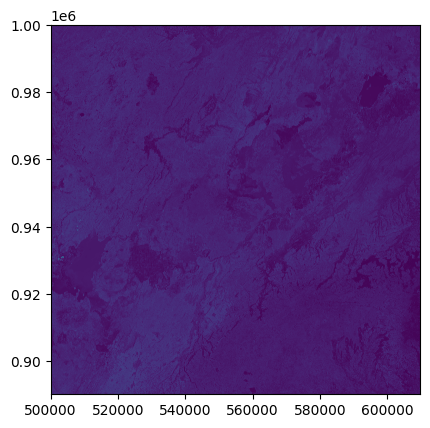

In [12]:
with rasterio.open(output_path) as src:
    show(src)

### Load stacked Sentinel 2 MSI image

In [13]:
sentinel_path = '/home/eoafrica/Sentinel2_AWbasin/outputs_rgb/stacked_rgb.tif'
sentinel_data = rasterio.open(sentinel_path)
sentinel_bands = sentinel_data.read()